In [132]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt 

In [133]:
import pandas as pd

def open_data(file_path):
    """
    This function reads a data file and returns a pandas DataFrame.
    :param file_path: path to the file
    :return: pandas DataFrame
    """
    # Use pandas to read the data file
    data = pd.read_csv(file_path)
    return data
data = open_data("Sales_Transactions_Dataset_Weekly.csv")


In [134]:
data

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,0,0,1,0,0,2,1,0,0,...,0.00,0.33,0.33,0.00,0.00,0.33,0.00,0.00,0.67,0.00
807,P816,0,1,0,0,1,2,2,6,0,...,0.43,0.43,0.57,0.29,0.57,0.71,0.71,0.71,0.86,0.71
808,P817,1,0,0,0,1,1,2,1,1,...,0.50,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.75
809,P818,0,0,0,1,0,0,0,0,1,...,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.00


In [135]:
normalized = data.iloc[:, 55:]


In [136]:
normalized

,Normalized 0,Normalized 1,Normalized 2,Normalized 3,Normalized 4,Normalized 5,Normalized 6,Normalized 7,Normalized 8,Normalized 9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,0.44,0.50,0.39,0.28,0.56,0.50,0.61,1.00,0.17,0.61,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,0.70,0.60,0.30,0.20,0.70,0.10,0.60,0.30,0.30,0.30,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,0.36,0.73,0.45,0.55,0.64,0.45,0.36,0.91,0.82,0.27,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,0.59,0.35,0.65,0.18,0.41,0.24,0.41,0.65,0.65,0.53,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,0.33,0.13,0.67,0.53,0.20,0.27,0.40,0.73,0.40,0.40,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,0.00,0.00,0.33,0.00,0.00,0.67,0.33,0.00,0.00,0.33,...,0.00,0.33,0.33,0.00,0.00,0.33,0.00,0.00,0.67,0.00
807,0.00,0.14,0.00,0.00,0.14,0.29,0.29,0.86,0.00,0.14,...,0.43,0.43,0.57,0.29,0.57,0.71,0.71,0.71,0.86,0.71
808,0.25,0.00,0.00,0.00,0.25,0.25,0.50,0.25,0.25,0.00,...,0.50,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.75
809,0.00,0.00,0.00,0.50,0.00,0.00,0.00,0.00,0.50,0.00,...,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.00


In [137]:
df = data.iloc[:, :53]
df

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,P1,11,12,10,8,13,12,14,21,6,...,4,7,8,10,12,3,7,6,5,10
1,P2,7,6,3,2,7,1,6,3,3,...,2,4,5,1,1,4,5,1,6,0
2,P3,7,11,8,9,10,8,7,13,12,...,6,14,5,5,7,8,14,8,8,7
3,P4,12,8,13,5,9,6,9,13,13,...,9,10,3,4,6,8,14,8,7,8
4,P5,8,5,13,11,6,7,9,14,9,...,7,11,7,12,6,6,5,11,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,0,0,1,0,0,2,1,0,0,...,0,1,1,0,0,1,0,0,2,0
807,P816,0,1,0,0,1,2,2,6,0,...,3,3,4,2,4,5,5,5,6,5
808,P817,1,0,0,0,1,1,2,1,1,...,2,0,0,2,2,0,0,0,4,3
809,P818,0,0,0,1,0,0,0,0,1,...,0,0,0,1,1,0,0,0,2,0


In [138]:
df

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,P1,11,12,10,8,13,12,14,21,6,...,4,7,8,10,12,3,7,6,5,10
1,P2,7,6,3,2,7,1,6,3,3,...,2,4,5,1,1,4,5,1,6,0
2,P3,7,11,8,9,10,8,7,13,12,...,6,14,5,5,7,8,14,8,8,7
3,P4,12,8,13,5,9,6,9,13,13,...,9,10,3,4,6,8,14,8,7,8
4,P5,8,5,13,11,6,7,9,14,9,...,7,11,7,12,6,6,5,11,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,0,0,1,0,0,2,1,0,0,...,0,1,1,0,0,1,0,0,2,0
807,P816,0,1,0,0,1,2,2,6,0,...,3,3,4,2,4,5,5,5,6,5
808,P817,1,0,0,0,1,1,2,1,1,...,2,0,0,2,2,0,0,0,4,3
809,P818,0,0,0,1,0,0,0,0,1,...,0,0,0,1,1,0,0,0,2,0


In [139]:
df_1 = df.drop('Product_Code',axis=1)
df_1

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,11,12,10,8,13,12,14,21,6,14,...,4,7,8,10,12,3,7,6,5,10
1,7,6,3,2,7,1,6,3,3,3,...,2,4,5,1,1,4,5,1,6,0
2,7,11,8,9,10,8,7,13,12,6,...,6,14,5,5,7,8,14,8,8,7
3,12,8,13,5,9,6,9,13,13,11,...,9,10,3,4,6,8,14,8,7,8
4,8,5,13,11,6,7,9,14,9,9,...,7,11,7,12,6,6,5,11,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,0,0,1,0,0,2,1,0,0,1,...,0,1,1,0,0,1,0,0,2,0
807,0,1,0,0,1,2,2,6,0,1,...,3,3,4,2,4,5,5,5,6,5
808,1,0,0,0,1,1,2,1,1,0,...,2,0,0,2,2,0,0,0,4,3
809,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,2,0


In [140]:

def create_sum_column(df_2, col_indices):
    # create an empty list to store the sums
    sums = []
    
    # iterate over the column indices in groups of 4
    for i in range(0, len(col_indices), 4):
        # select the next 4 columns
        cols_to_sum = normalized.iloc[:, col_indices[i:i+4]]
        print('THe:',cols_to_sum)
        
        # sum the columns and append to the list
        sums.append(cols_to_sum.sum(axis=1))
    new_col = pd.Series(sums).sum()

    
    # add the new column to the DataFrame
    df_1["Month 1"] = new_col
    df_1["Month 2"] = new_col
    df_1["Month 3"] = new_col
    df_1["Month 4"] = new_col
    df_1["Month 5"] = new_col
    df_1["Month 6"] = new_col
    df_1["Month 7"] = new_col
    df_1["Month 8"] = new_col
    df_1["Month 9"] = new_col
    df_1["Month 10"] = new_col
    df_1["Month 11"] = new_col
    df_1["Month 12"] = new_col
    df_1["Month 13"] = new_col
    
    return data

# load dataset
df_2 = df_1

# call the function
col_indices = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51]
df_2 = create_sum_column(df_2, col_indices)

# print the result
print(df_2)


THe:      Normalized 0  Normalized 1  Normalized 2  Normalized 3
0            0.44          0.50          0.39          0.28
1            0.70          0.60          0.30          0.20
2            0.36          0.73          0.45          0.55
3            0.59          0.35          0.65          0.18
4            0.33          0.13          0.67          0.53
..            ...           ...           ...           ...
806          0.00          0.00          0.33          0.00
807          0.00          0.14          0.00          0.00
808          0.25          0.00          0.00          0.00
809          0.00          0.00          0.00          0.50
810          0.00          0.33          0.00          0.00

[811 rows x 4 columns]
THe:      Normalized 4  Normalized 5  Normalized 6  Normalized 7
0            0.56          0.50          0.61          1.00
1            0.70          0.10          0.60          0.30
2            0.64          0.45          0.36          0.91
3     

    Product_Code  W0  W1  W2  W3  W4  W5  W6  W7  W8  ...  Normalized 42  \
0             P1  11  12  10   8  13  12  14  21   6  ...           0.06   
1             P2   7   6   3   2   7   1   6   3   3  ...           0.20   
2             P3   7  11   8   9  10   8   7  13  12  ...           0.27   
3             P4  12   8  13   5   9   6   9  13  13  ...           0.41   
4             P5   8   5  13  11   6   7   9  14   9  ...           0.27   
..           ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...            ...   
806         P815   0   0   1   0   0   2   1   0   0  ...           0.00   
807         P816   0   1   0   0   1   2   2   6   0  ...           0.43   
808         P817   1   0   0   0   1   1   2   1   1  ...           0.50   
809         P818   0   0   0   1   0   0   0   0   1  ...           0.00   
810         P819   0   1   0   0   0   0   0   0   0  ...           0.00   

     Normalized 43  Normalized 44  Normalized 45  Normalized 46  \
0             0.22  

In [141]:
df_2 = df_1.iloc[:, 52:].sum()
print(df_2)

Month 1     13163.12
Month 2     13163.12
Month 3     13163.12
Month 4     13163.12
Month 5     13163.12
Month 6     13163.12
Month 7     13163.12
Month 8     13163.12
Month 9     13163.12
Month 10    13163.12
Month 11    13163.12
Month 12    13163.12
Month 13    13163.12
dtype: float64


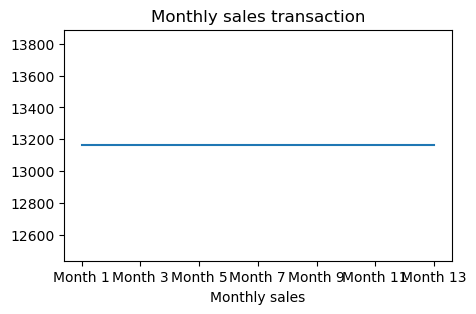

In [142]:

df_2.plot(kind='line')
plt.xlabel("Monthly sales")
plt.title('Monthly sales transaction')
plt.savefig('Monthly transaction.png')
plt.show()

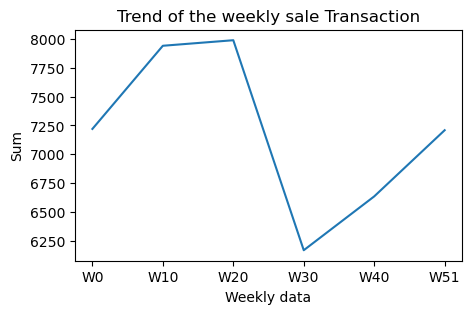

In [143]:

label = 'Week 0', 'Week 10', 'Week 20', 'Week 30', 'Week 40', 'Week 50'
columns_to_sum = ['W0', 'W10', 'W20', 'W30', 'W40', 'W51']
data_sum = data[columns_to_sum].sum()

# Create a line graph
plt.plot(data_sum)
plt.ylabel('Sum')
plt.xlabel('Weekly data')
plt.title('Trend of the weekly sale Transaction')
plt.savefig('Weekly sales trend.png', bbox_inches='tight')
plt.show()

In [144]:
# Convert to numpy array
array = df_1.values
array

array([[11.  , 12.  , 10.  , ..., 19.13, 19.13, 19.13],
       [ 7.  ,  6.  ,  3.  , ..., 20.7 , 20.7 , 20.7 ],
       [ 7.  , 11.  ,  8.  , ..., 26.87, 26.87, 26.87],
       ...,
       [ 1.  ,  0.  ,  0.  , ...,  6.5 ,  6.5 ,  6.5 ],
       [ 0.  ,  0.  ,  0.  , ...,  8.5 ,  8.5 ,  8.5 ],
       [ 0.  ,  1.  ,  0.  , ...,  5.31,  5.31,  5.31]])

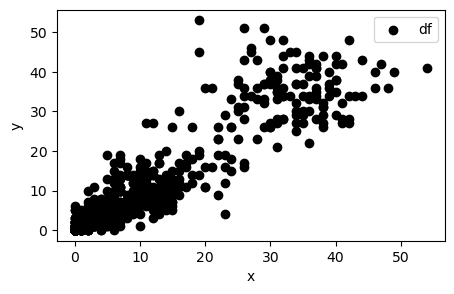

In [145]:

def scatter_plot_numpy(array, x_columns, y_columns, labels = None, colors = None):
    """
    This function creates a scatter plot of multiple columns in a numpy array
    :param data: numpy array
    :param x_columns: list of column indices for x-axis
    :param y_columns: list of column indices for y-axis
    :param labels: list of labels for each data set
    :param colors: list of colors for each data set
    """
    if labels is None:
        labels = ['']*len(x_columns)
    if colors is None:
        colors = ['black']*len(x_columns)
    for i in range(len(x_columns)):
        x = array[:,x_columns[i]]
        y = array[:,y_columns[i]]
        plt.scatter(x, y, label = labels[i], color = colors[i])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.savefig('Scatter plot.png')
    plt.show()



scatter_plot_numpy(array, [0], [1], labels = ['df'])


In [146]:
neigh = NearestNeighbors(n_neighbors=2)
nbres= neigh.fit(array)
distance, indices= nbres.kneighbors(array)

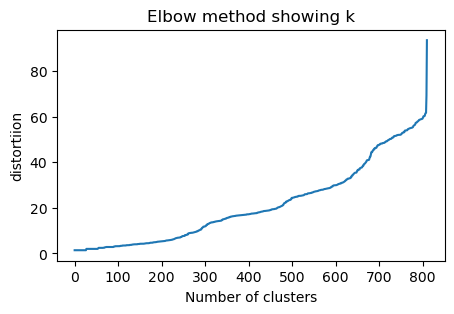

In [147]:
distance=np.sort(distance, axis=0)
distance = distance[:, 1]
plt.rcParams['figure.figsize'] = (5,3)
plt.plot(distance)
plt.xlabel('Number of clusters')
plt.ylabel('distortiion')
plt.title('Elbow method showing k')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

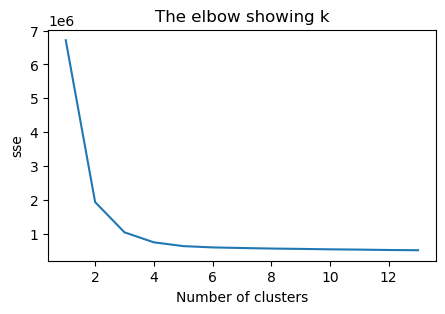

In [148]:
sse = []
for i in range(1, 14):
    kmeans = KMeans(n_clusters= i,
    init = 'k-means++', max_iter= 300, n_init = 10)
    kmeans.fit(array)
    sse.append(kmeans.inertia_)
plt.plot(range(1,14), sse)
plt.title('The elbow showing k')
plt.xlabel("Number of clusters")
plt.ylabel('sse')
plt.savefig('Elbow.png')
plt.show

In [149]:
#print(array)

In [150]:
arrray = StandardScaler().fit_transform(array)

In [151]:
print(arrray)

[[ 0.17391867  0.22859969  0.04681724 ...  0.36176207  0.36176207
   0.36176207]
 [-0.15776396 -0.2492208  -0.49011498 ...  0.55766172  0.55766172
   0.55766172]
 [-0.15776396  0.14896294 -0.10659197 ...  1.32753485  1.32753485
   1.32753485]
 ...
 [-0.65528791 -0.72704129 -0.72022878 ... -1.21416947 -1.21416947
  -1.21416947]
 [-0.73820856 -0.72704129 -0.72022878 ... -0.96461578 -0.96461578
  -0.96461578]
 [-0.73820856 -0.64740454 -0.72022878 ... -1.36265392 -1.36265392
  -1.36265392]]


In [152]:
# Perform DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5, metric ='euclidean', algorithm ='auto').fit(arrray)
print(set(dbscan.labels_))

{0, 1, -1}


In [153]:
clusters = dbscan.fit_predict(arrray)


In [154]:
np.unique(clusters)

array([-1,  0,  1], dtype=int64)

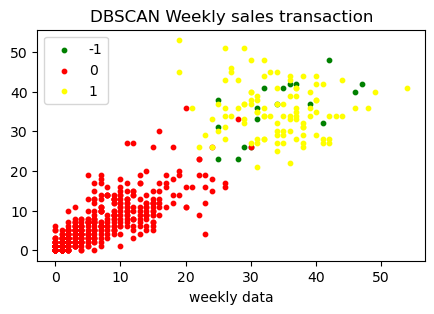

In [155]:
plt.scatter(array[clusters== -1, 0], array[clusters== -1, 1], s=10, c='green', label = '-1')
plt.scatter(array[clusters== 0, 0], array[clusters== 0, 1], s=10, c='red', label = '0')
plt.scatter(array[clusters== 1, 0], array[clusters== 1, 1], s=10, c='yellow', label = '1')
#plt.scatter(array[clusters== 3, 0], array[clusters== 3, 1], s=10, c='yellow')
#plt.scatter(array[clusters== 4, 0], array[clusters== 4, 1], s=10, c='yellow')
#plt.scatter(array[clusters== 5, 0], array[clusters== 5, 1], s=10, c='silver')

plt.xlabel('weekly data')
plt.legend()
plt.title('DBSCAN Weekly sales transaction')
plt.savefig('DBSCAN', bbox_inches='tight')
plt.show()